In [6]:
from pyspark.sql import SparkSession

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [7]:
sc.install_pypi_package("pandas")
sc.install_pypi_package("seaborn")
sc.install_pypi_package("tabulate")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Package already installed for current Spark context!
Traceback (most recent call last):
  File "/usr/lib/spark/python/lib/pyspark.zip/pyspark/context.py", line 1110, in install_pypi_package
    raise ValueError("Package already installed for current Spark context!")
ValueError: Package already installed for current Spark context!



In [8]:
import numpy as np
import pyspark.sql.functions as F
from pyspark.sql.types import *
from pyspark.sql import Row
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [9]:
in_bucket = "s3://tfmbigdata/Files_Segunda_Entrega/Customers.json"
customers = spark.read.format("json").load(in_bucket)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [10]:
customers.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----+-----------------+------+--------------+----------------+--------------+------------------+-------+
| age|       customerid|gender|isocountrycode|registrationdate|regularstoreid|unregistrationdate|zipcode|
+----+-----------------+------+--------------+----------------+--------------+------------------+-------+
|  54|77340000025947697|     F|            ES|      2017-11-25|        ES0445|              null|  48530|
|null|77340000025944593|  null|            ES|      2017-11-25|        ES4010|              null|   null|
|null|77340000025930334|  null|            ES|      2017-11-25|        ES4002|              null|   null|
|null|77340000025919664|  null|            ES|      2017-11-25|        ES0405|              null|   null|
|  44|77340000025914329|     F|            ES|      2017-11-25|        ES4002|              null|  01015|
|  42|77340000025898906|     F|            ES|      2017-11-25|        ES4503|              null|  50021|
|  56|77340000025889206|     F|            ES|

In [11]:
rows_count = customers.count()
columns = len(customers.columns)

print("Rows: ",rows_count,"\nColumns: ", columns)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Rows:  49998 
Columns:  8

In [12]:
customers.describe().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+------------------+--------------------+------------------+--------------+----------------+--------------+------------------+------------------+
|summary|               age|          customerid|            gender|isocountrycode|registrationdate|regularstoreid|unregistrationdate|           zipcode|
+-------+------------------+--------------------+------------------+--------------+----------------+--------------+------------------+------------------+
|  count|             44138|               49998|             44006|         49998|           49998|         49998|                 7|             41889|
|   mean| 45.71813403416557|7.702334563650644...|0.4444444444444444|          null|            null|          null|              null| 25916.29789647104|
| stddev|11.767718415966268|8.597990081615628E13|0.8819171036881968|          null|            null|          null|              null|14756.114014752437|
|    min|                17|   77000000050013325|                 0|        

In [13]:
summary = customers.summary()
missing_ratio = 1-(np.array(list(summary.filter(summary['summary'] == 'count').collect()[0].asDict().values())[1:], dtype=int))/rows_count
mr_row = spark.createDataFrame([['missing_ratio']+[float(x)*100 for x in missing_ratio]], summary.columns)
unique_row = customers.agg(*(F.countDistinct(F.col(c)).alias(c) for c in customers.columns)).withColumn('summary',F.lit('unique'))
summary = summary.unionByName(mr_row)
summary = summary.unionByName(unique_row)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [14]:
print(tabulate(summary.toPandas(), headers = 'keys', tablefmt = 'grid',showindex=False,floatfmt=".3f")) 

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------------+-----------+-----------------------+--------------------+------------------+--------------------+------------------+----------------------+--------------------+
| summary       |       age |            customerid | gender             | isocountrycode   | registrationdate   | regularstoreid   | unregistrationdate   | zipcode            |
+===============+===========+=======================+====================+==================+====================+==================+======================+====================+
| count         | 44138.000 |             49998.000 | 44006              | 49998            | 49998              | 49998            | 7                    | 41889              |
+---------------+-----------+-----------------------+--------------------+------------------+--------------------+------------------+----------------------+--------------------+
| mean          |    45.718 | 77023345636506448.000 | 0.4444444444444444 |                  |                 

# Géneros

In [15]:
# Cogemos los datos de la columna elegida y agregamos el count 
genders = customers.select("gender").groupBy("gender").count()
genders_pd = genders.toPandas()
print(tabulate(genders_pd, headers = 'keys', tablefmt = 'grid',showindex=False,floatfmt=".3f")) 

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------+---------+
| gender   |   count |
+==========+=========+
|          |    5992 |
+----------+---------+
| M        |   14792 |
+----------+---------+
| 0        |       7 |
+----------+---------+
| F        |   29155 |
+----------+---------+
| O        |      50 |
+----------+---------+
| 2        |       2 |
+----------+---------+

In [16]:
genders_pd

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  gender  count
0   None   5992
1      M  14792
2      0      7
3      F  29155
4      O     50
5      2      2

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

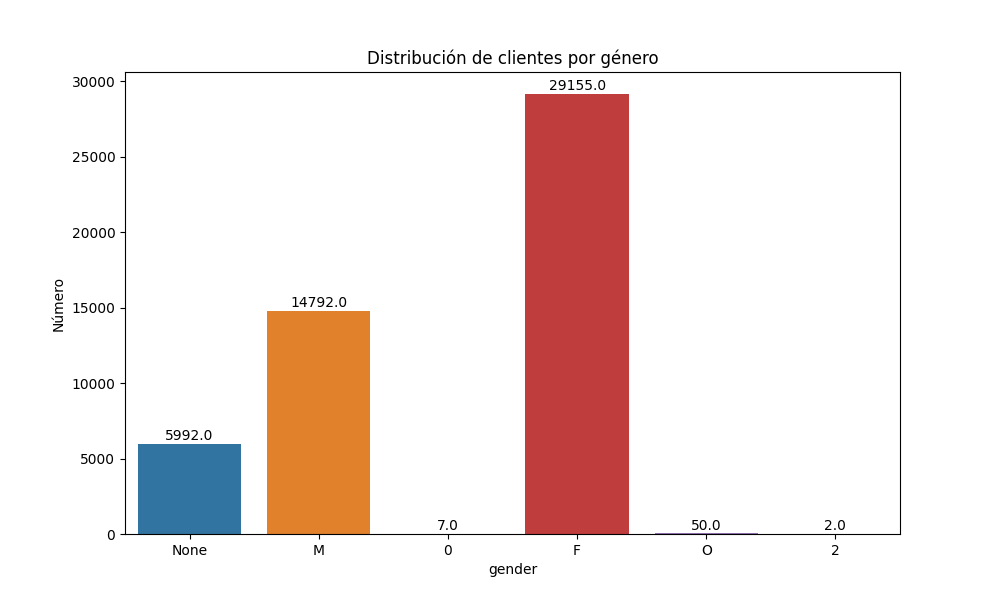

In [17]:
#Visualizamos
plt.clf()
plt.figure(figsize=(10,6))
splot = sns.barplot(y="count", x="gender", data=genders_pd.fillna('None'))
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()+500), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 0), 
                   textcoords = 'offset points')
# splot.set_xticklabels(splot.get_xticklabels(), rotation=70)
splot.set_title('Distribución de clientes por género')
plt.ylabel('Número')
# plt.yscale('logit')

%matplot plt

# Edad

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

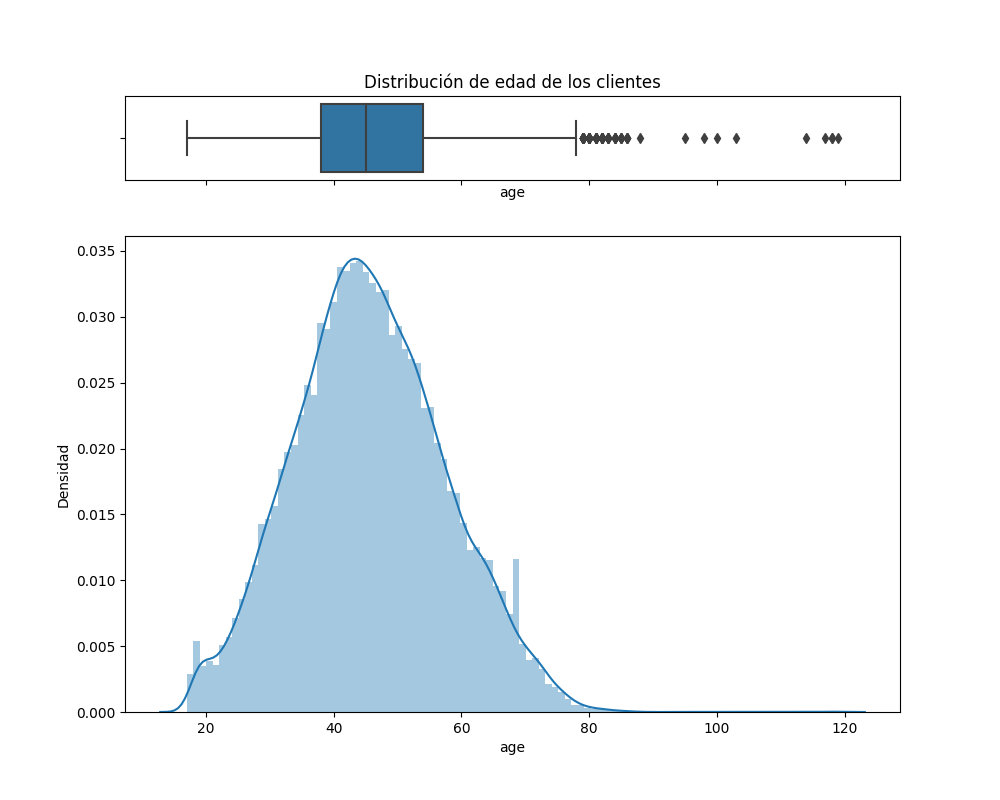

In [18]:
# Plot age distribution
customers_pd = customers.toPandas()
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(10, 8), gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(x="age", data=customers_pd, ax=ax[0])
sns.distplot(customers_pd["age"].dropna(),bins=100,ax=ax[1])
ax[0].set_title('Distribución de edad de los clientes')
plt.ylabel('Densidad')
%matplot plt

In [19]:
hist = customers.rdd\
  .map(lambda l: l['age'])\
  .histogram([1, 20, 35, 50, 65,150])

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [20]:
#Use zip to link age_ranges to their counts
countTuples = zip(hist[0], hist[1])
#make a list from that
ageList = list(map(lambda l: Row(age_range=l[0], count=l[1]), countTuples))
age_buckets = sc.parallelize(ageList).toDF().toPandas()
age_buckets

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

   age_range  count
0          1    370
1         20   7275
2         35  20491
3         50  13140
4         65   2862

In [21]:
age_buckets = age_buckets.set_index('age_range').transpose()\
           .rename(columns={1: "<20", 20: "20-34", 35: "35-49", 50: "50-64", 65: "+65"})

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [22]:
age_buckets  = pd.DataFrame(age_buckets.T.to_records())

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

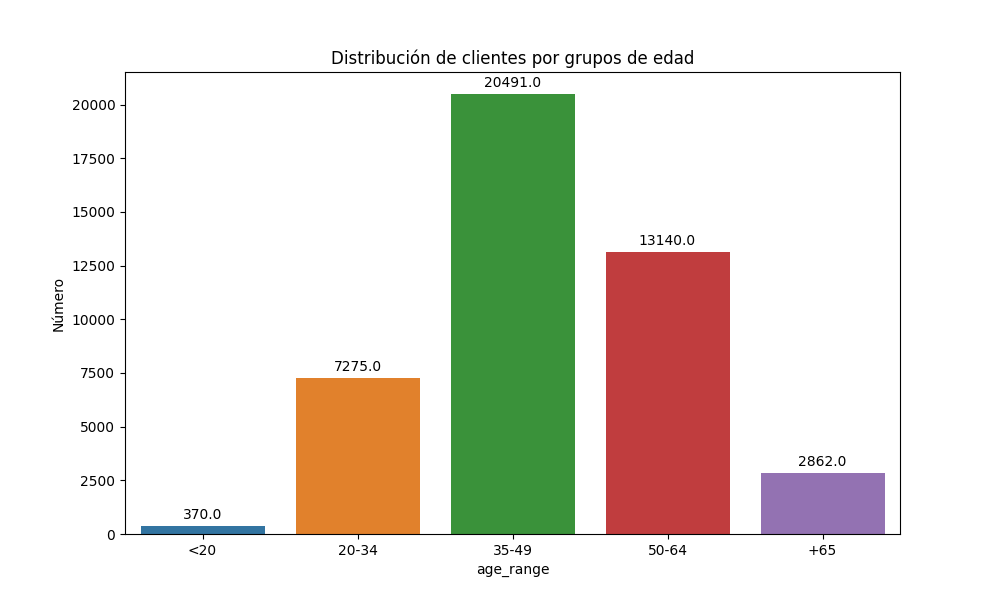

In [23]:
#Visualizamos
plt.clf()
plt.figure(figsize=(10,6))
splot = sns.barplot(y="count", x="age_range", data=age_buckets)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()+500), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 0), 
                   textcoords = 'offset points')
# splot.set_xticklabels(splot.get_xticklabels(), rotation=70)
splot.set_title('Distribución de clientes por grupos de edad')
plt.ylabel('Número')
# plt.yscale('logit')

%matplot plt

# Fecha de registro

In [39]:
df_groupedby_date = customers.select(F.date_format('registrationdate','yyyy-MM').alias('month')).groupby('month').count().toPandas()
# df_groupedby_date = customers.groupby('registrationdate').count().toPandas()
# df_groupedby_date.reset_index(inplace=True)
# plt.plot_date(x=df_groupedby_date['Date'], y=df_groupedby_date['Value'])

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

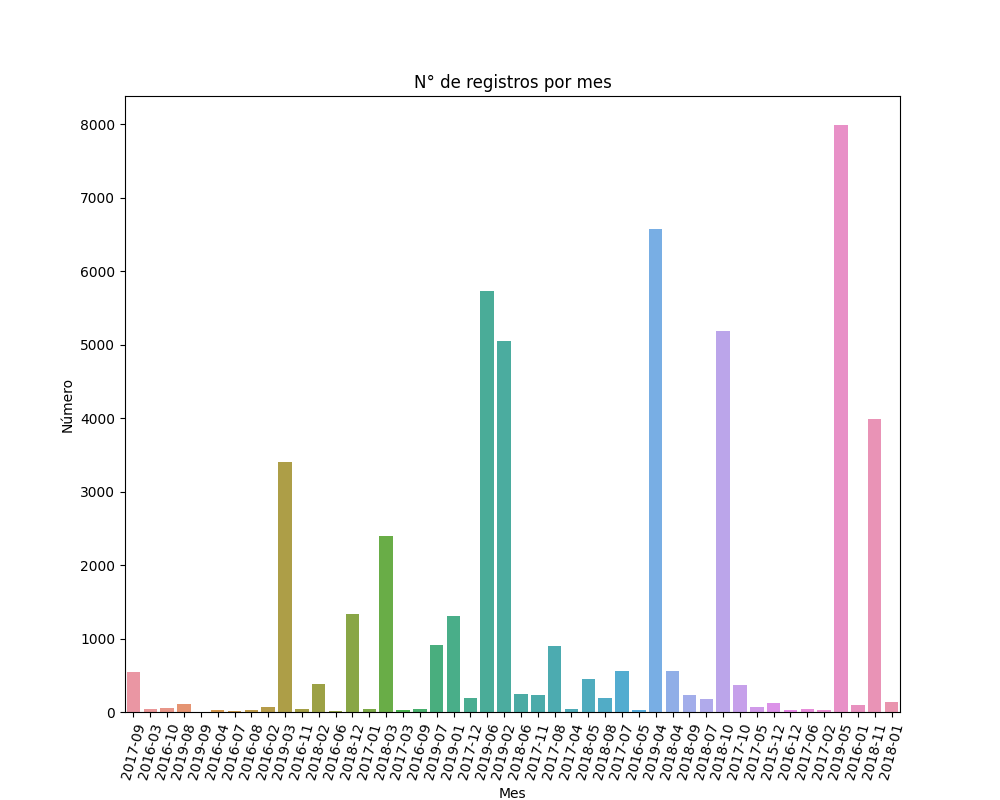

In [48]:
plt.clf()
plt.figure(figsize=(10,8))
sns.barplot(x="month", y="count", data=df_groupedby_date)
plt.xticks(rotation=75)
plt.xlabel('Mes')
plt.ylabel('Número')
plt.title('N° de registros por mes')
plt.show()
%matplot plt